# import packages
Import all of necessary pakages we need, which include NunPy, Pandas, Matplotlib, Scikit-learn.

In [1]:
# import essencial packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as seabornInstance
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

# Loading Finance Dateset - Disney from YahooFinance
Use Pandas to read in the data and set the independent variable to be the Date. and see the first 5 rows data.

In [2]:
df = pd.read_csv('DIS.csv')
# converts string to datetime
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
# set the index of dataset to date column
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-27,135.770004,135.990005,134.190002,134.490005,134.490005,6013600
2019-08-28,134.059998,136.729996,133.520004,136.550003,136.550003,5950500
2019-08-29,138.119995,138.679993,137.419998,137.839996,137.839996,6532700
2019-08-30,138.289993,138.500000,136.759995,137.259995,137.259995,5622200
2019-09-03,136.369995,136.419998,135.059998,136.309998,136.309998,5989397


Let's take a look at how the prices looks like each day since the beginning up to this point with the date on the x-axis and the price on the y-axis.

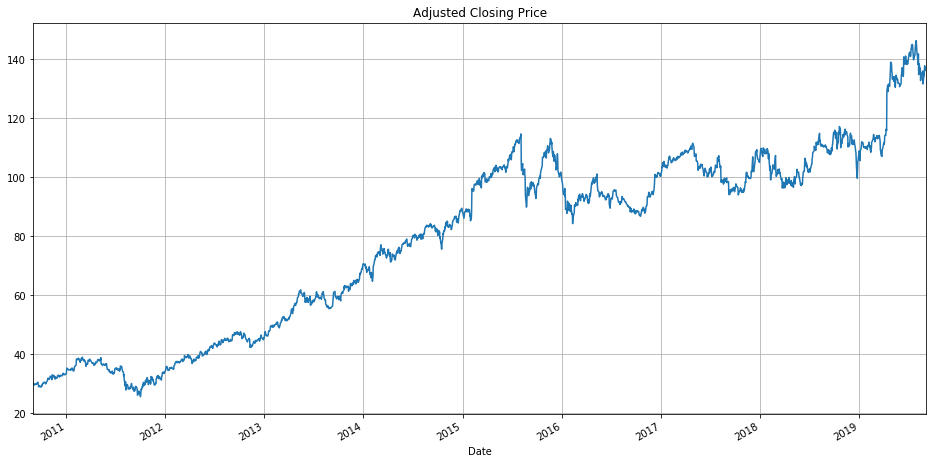

In [3]:
df['Adj Close'].plot(label='DIS', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Preprocessing & Cross Validation

In [4]:
# number of how many days to forecast
forecast_out = 90
# Add new label here, we want to predict the 'Adj Close'
df['Prediction'] = df['Adj Close'].shift(-forecast_out)
x = np.array(df.drop(['Prediction'], 1))
# Scale the x so that eveyone can have the same distribution for linear regression
# x = preprocessing.scale(x)
# Finally wa want to find data se
# x_lately = x[-forecast_out:]
x = x[:-forecast_out]
# separate label and identify it as y
y = np.array(df['Prediction'])
y = y[:-forecast_out]

# Training set & data set for test
We split 80% of the data to training set while 20% of the data to test set using below code.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# Model Generation
Now lets train our model.

In [6]:
# train model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

[ 1.54482884e-01  9.26009684e-01 -7.47687200e-01 -1.94768800e+00
  2.56573588e+00 -6.61728961e-08] 14.89363616919664


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1845.3371533308382, tolerance: 152.97513642732093
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Evaluation
the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [7]:
# each models score
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel Score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel Score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel Score:', lasso_model_score)

LinearModel Score: 0.9206179930779521
RidgeModel Score: 0.9206221080490876
LassoModel Score: 0.9192037783037565


# Prediction
let's do prediction on test data.

In [8]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)

# Plotting the Prediction
Based on the forecast, we will visualize the plot with our existing historical data. This will help us visualize how the model fares to predict future stocks pricing.

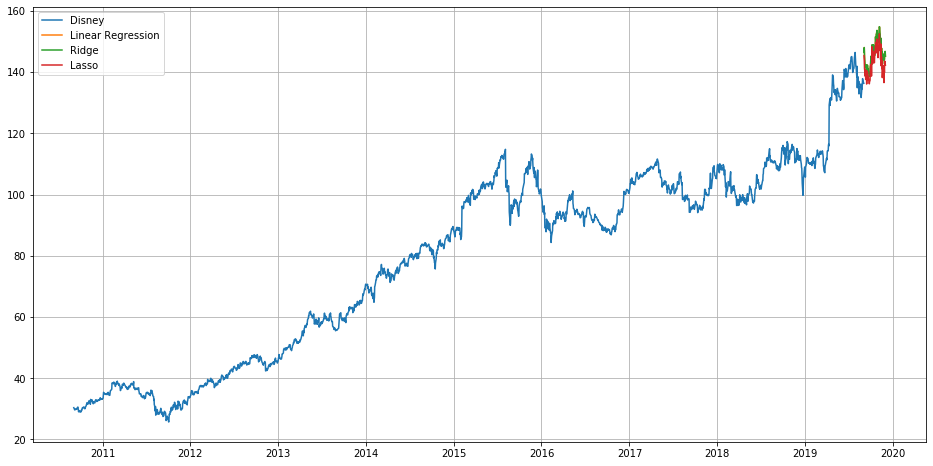

In [9]:
predicted_dates = []
recent_date = df.index.max()
for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)
    
# plt.title('Adjusted Closing Price')
# plt.xlabel('Date')
# plt.ylabel('Price')
plt.figure(figsize=(16,8))
plt.grid(True)
plt.plot(df.index, df['Adj Close'], label='Disney')
plt.plot(predicted_dates, linear_model_forecast_prediction, label='Linear Regression')
plt.plot(predicted_dates, ridge_model_forecast_prediction, label='Ridge')
plt.plot(predicted_dates, lasso_model_forecast_prediction, label='Lasso')
plt.legend()